<a href="https://colab.research.google.com/github/amoreano/PROYECTO1_CD/blob/main/Inferencia_Estad%C3%ADstica_14_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

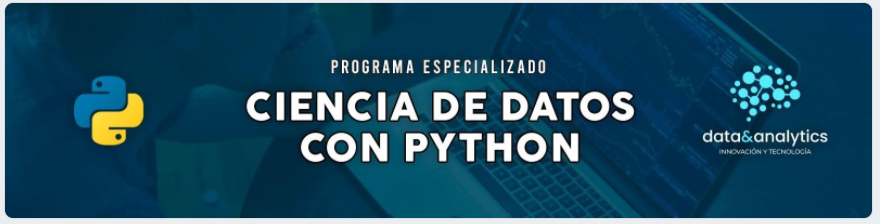

#DATA & ANALYTICS

----------------------------
SESIÓN 03. INTRODUCCION A LA INFERENCIA ESTADISTICA

Instructor: Ing. Yaneth Ccahuantico

E-mail: yane.data@gmail.com

www.datayanalytics.com

In [1]:
#cargamos las librerias
import pandas as pd
import seaborn as sns # visualización
import statistics as stats # estadística
import random

random.seed(123)

## 1. Importamos los datos

In [2]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving Data - Riesgos.csv to Data - Riesgos.csv


{'Data - Riesgos.csv': b'ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo\r\n2208,33,128,6,3230,192,2,3,2,1\r\n2211,32,185,7,2930,217,2,1,5,1\r\n2212,28,,7,1883.7,202,2,1,2,1\r\n2216,56,200,0,850,194,2,1,5,1\r\n2218,32,131,65,3200,200,2,1,2,1\r\n2219,34,145,6,7000,196,2,5,2,1\r\n2226,,114,0,2171.5,178,2,2,1,1\r\n2227,27,116,0,800,169,2,1,5,1\r\n2228,26,182,6,3150,190,4,3,5,1\r\n2230,25,154,1,2600,189,2,1,2,1\r\n2233,49,203,0,6350,224,4,1,2,1\r\n2234,49,159,0,3330,221,2,1,5,1\r\n2235,28,127,0,1400,177,2,1,5,1\r\n2236,30,137,0,6000,192,2,1,5,1\r\n2238,45,151,18,1050,173,2,4,5,1\r\n2240,21,118,0,,175,4,1,5,1\r\n2244,37,330,8,2432,174,2,3,5,1\r\n2247,36,257,0,1400,186,2,3,2,1\r\n2248,32,163,0,3000,175,2,3,5,1\r\n2252,25,128,0,889.98,169,2,1,5,1\r\n2254,32,127,0,1200,175,2,1,5,1\r\n2258,38,151,0,2000,180,2,1,5,1\r\n2261,26,148,12,2052.84,196,2,1,2,1\r\n2262,26,142,21,1500,178,2,3,2,1\r\n2263,40,130,5,3486.7,216,4,2,5,1\r\n2264,30,119,0,2833.55,211,2,1,5,1\r\n2267,24,110,0

In [3]:
#levantamos la data con pandas
data_riesgo = pd.read_csv('Data - Riesgos.csv')
data_riesgo.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33.0,128.0,6.0,3230.0,192.0,2,3.0,2,1
1,2211,32.0,185.0,7.0,2930.0,217.0,2,1.0,5,1
2,2212,28.0,NaN,7.0,1883.7,202.0,2,1.0,2,1
3,2216,56.0,200.0,0.0,850.0,194.0,2,1.0,5,1
4,2218,32.0,131.0,65.0,3200.0,200.0,2,1.0,2,1


In [4]:
data_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             4500 non-null   int64  
 1   edad           4487 non-null   float64
 2   meses          4494 non-null   float64
 3   max_ant        4496 non-null   float64
 4   ingreso        4495 non-null   float64
 5   score          4495 non-null   float64
 6   tipo_vivienda  4500 non-null   int64  
 7   zona           4494 non-null   float64
 8   nivel          4500 non-null   int64  
 9   riesgo         4500 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 351.7 KB


### Separamos la data en 2 partes para imputar

In [5]:
# Data numérica
# 'edad', 'meses', 'max_ant', 'ingreso', 'score'
data_riesgo_num = data_riesgo.loc[:, ['edad', 'meses', 'max_ant', 'ingreso', 'score']] 
data_riesgo_num.head(6)

,edad,meses,max_ant,ingreso,score
0,33.0,128.0,6.0,3230.0,192.0
1,32.0,185.0,7.0,2930.0,217.0
2,28.0,NaN,7.0,1883.7,202.0
3,56.0,200.0,0.0,850.0,194.0
4,32.0,131.0,65.0,3200.0,200.0
5,34.0,145.0,6.0,7000.0,196.0


In [ ]:
# Data categórica 
#'tipo_vivienda', 'zona', 'nivel', 'riesgo'
data_riesgo_cat = data_riesgo.loc[:, ['tipo_vivienda', 'zona', 'nivel', 'riesgo']] 
data_riesgo_cat.head(6)

,tipo_vivienda,zona,nivel,riesgo
0,2,3.0,2,1
1,2,1.0,5,1
2,2,1.0,2,1
3,2,1.0,5,1
4,2,1.0,2,1
5,2,5.0,2,1


## 2. Información de datos perdidos

In [ ]:
# Observamos los datos perdidos
data_riesgo_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4487 non-null   float64
 1   meses    4494 non-null   float64
 2   max_ant  4496 non-null   float64
 3   ingreso  4495 non-null   float64
 4   score    4495 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


In [ ]:
# Convertimos en tipo "str"
# Observamos los datos perdidos

#data_riesgo_cat = data_riesgo_cat.apply(lambda x: x.astype('str'), axis = 0)

#data_riesgo_cat.info()

Verificamos que no todas las variables son numéricas, tenemos también variables categóricas

## 3. Imputación paramétrica

In [ ]:
# Reemplazando con la median de cada columna: Variables Cuantitativas

data_riesgo_num2 = data_riesgo_num.apply(lambda x: x.fillna(x.median()), axis = 0)
data_riesgo_num2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


In [ ]:
# Reemplazando con la moda de cada columna: Variables Cualitativas

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='most_frequent') # Moda
data_riesgo_cat2 = simple.fit_transform(data_riesgo_cat)

data_riesgo_cat2

array([[2., 3., 2., 1.],
       [2., 1., 5., 1.],
       [2., 1., 2., 1.],
       ...,
       [4., 1., 2., 0.],
       [4., 5., 2., 0.],
       [4., 5., 2., 0.]])

In [ ]:
# Convertimos en DataFrame la matriz

data_riesgo_cat2 = pd.DataFrame(
    data=data_riesgo_cat2,
    columns=['tipo_vivienda', 'zona', 'nivel', 'riesgo'])
data_riesgo_cat2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_vivienda  4500 non-null   float64
 1   zona           4500 non-null   float64
 2   nivel          4500 non-null   float64
 3   riesgo         4500 non-null   float64
dtypes: float64(4)
memory usage: 140.8 KB


In [ ]:
# Unimos los DataFrame imputados

data_riesgo_f = pd.merge(data_riesgo_num2, data_riesgo_cat2, left_index=True, right_index=True)
data_riesgo_f.head()

,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,33.0,128.0,6.0,3230.0,192.0,2.0,3.0,2.0,1.0
1,32.0,185.0,7.0,2930.0,217.0,2.0,1.0,5.0,1.0
2,28.0,161.0,7.0,1883.7,202.0,2.0,1.0,2.0,1.0
3,56.0,200.0,0.0,850.0,194.0,2.0,1.0,5.0,1.0
4,32.0,131.0,65.0,3200.0,200.0,2.0,1.0,2.0,1.0


## Gráficos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


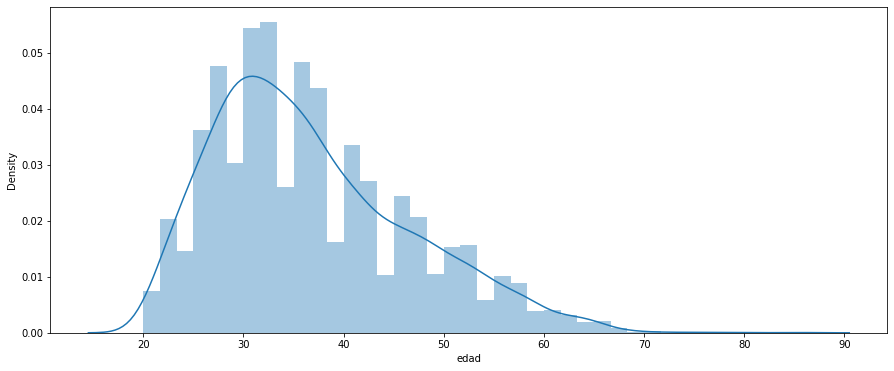

In [ ]:
import matplotlib.pyplot as plt

# Edad
plt.figure(figsize=(15,6))
sns.distplot(data_riesgo_f['edad'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


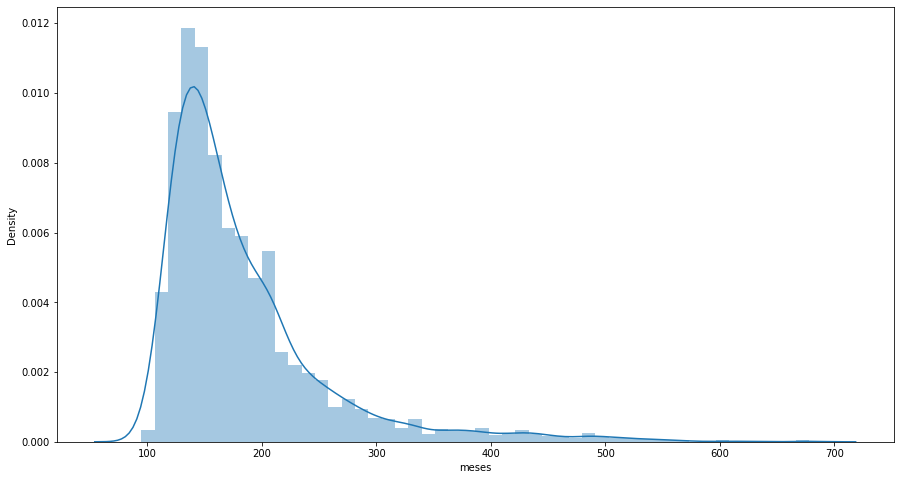

In [ ]:
# Meses
plt.figure(figsize=(15,8))
sns.distplot(data_riesgo_f['meses'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


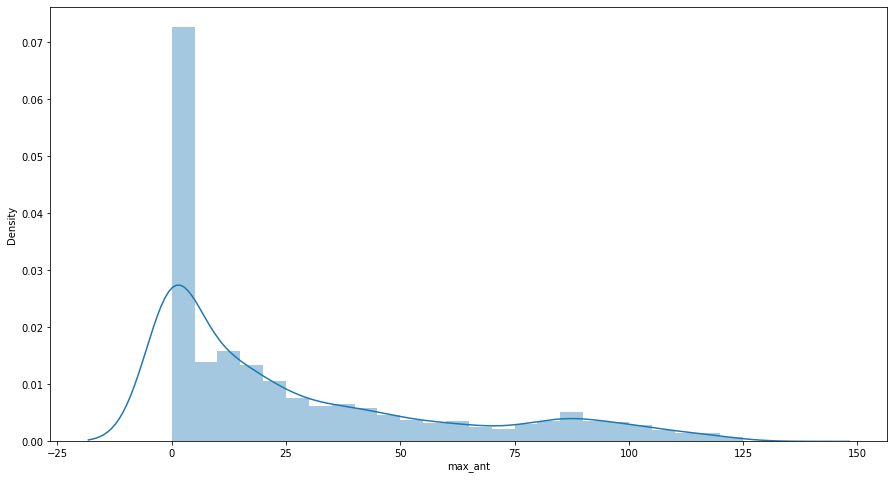

In [ ]:
# max_ant
plt.figure(figsize=(15,8))
sns.distplot(data_riesgo_f['max_ant'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


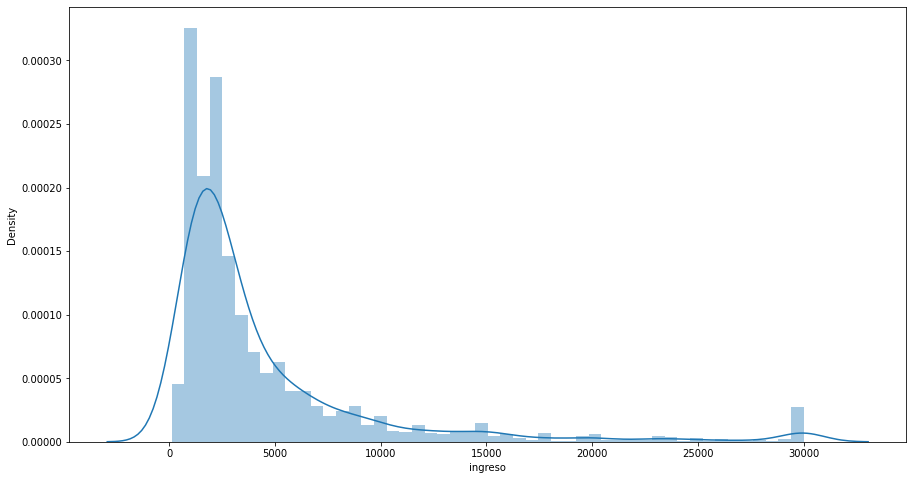

In [ ]:
# Ingreso
plt.figure(figsize=(15,8))
sns.distplot(data_riesgo_f['ingreso'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


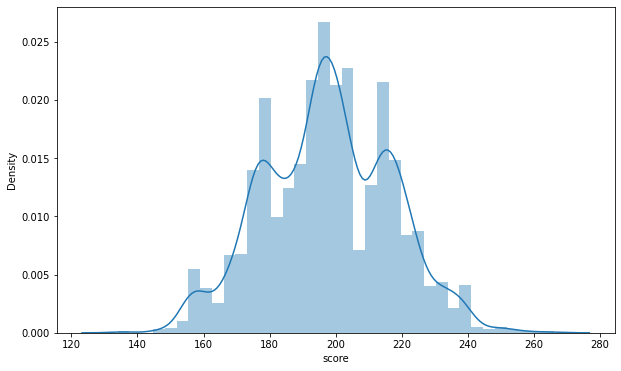

In [ ]:
# Score
plt.figure(figsize=(10,6))
sns.distplot(data_riesgo_f['score'])
plt.show()

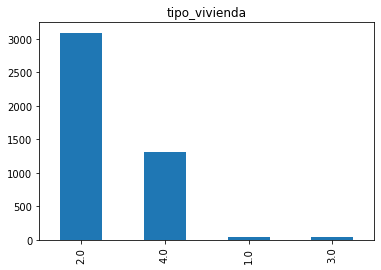

In [ ]:
# Variables cualitativas

d1 = data_riesgo_f.tipo_vivienda.value_counts()
d1.plot(kind='bar', title='tipo_vivienda')

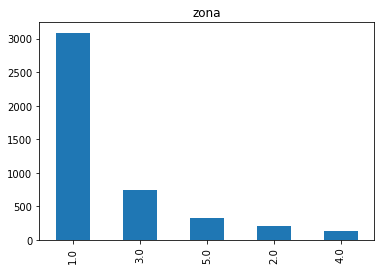

In [ ]:
d1 = data_riesgo_f.zona.value_counts()
d1.plot(kind='bar', title='zona')

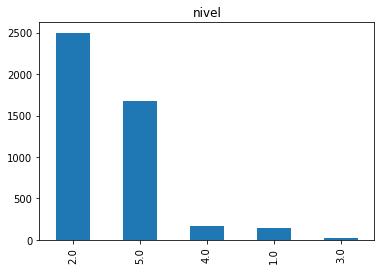

In [ ]:
d1 = data_riesgo_f.nivel.value_counts()
d1.plot(kind='bar', title='nivel')

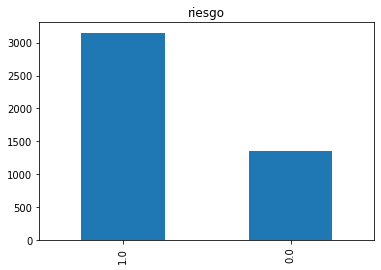

In [ ]:
d1 = data_riesgo_f.riesgo.value_counts()
d1.plot(kind='bar', title='riesgo')

## Análisis descriptivo

In [ ]:
#data_riesgo_f = data_riesgo_f.fillna(0)
percentiles = [.1, .25, .5, .75, .9]
Descrip = data_riesgo_num2.describe(percentiles=percentiles).T
Descrip

,count,mean,std,min,10%,25%,50%,75%,90%,max
edad,4500.0,36.709333,9.820684,20.0,25.000,29.000,35.0,43.0,51.0,85.0
meses,4500.0,183.818222,73.047673,95.0,123.000,137.000,161.0,207.0,269.0,678.0
max_ant,4500.0,26.913556,32.680750,0.0,0.000,0.000,14.0,42.0,85.1,130.0
ingreso,4500.0,4495.077702,5462.829033,123.7,948.139,1408.105,2500.0,5000.0,10000.0,30000.0
score,4500.0,197.563556,19.280483,134.0,174.000,183.000,197.0,213.0,221.0,266.0


## Prueba de normalidad

PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos      
Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


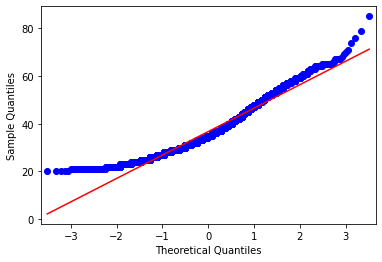

In [ ]:
# Prueba normalidad: Edad

qqplot(data_riesgo_f['edad'] , line='s')
plt.show()

In [ ]:
# Prueba de Shapiro-Wilk (n < =50)
stat, p = shapiro(data_riesgo_f['edad'])

print('Estadisticos=%.3f, p-value=%.3f' % (stat, p))


Estadisticos=0.952, p-value=0.000


In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['edad'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))


Estadisticos=1.000, p-value=0.000


In [ ]:
#Decisión: 
#Con un nivel de significancia del 5%, se afirma que, los datos de la variables "Edad" no están normalmente distribuidos. 

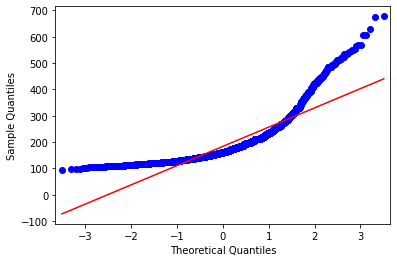

In [ ]:
# Prueba normalidad: meses

qqplot(data_riesgo_f['meses'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['meses'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


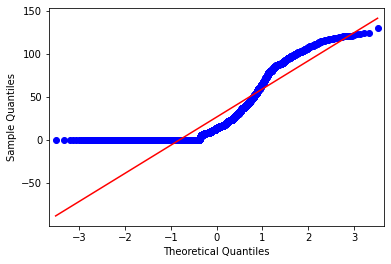

In [ ]:
# Prueba normalidad: max_ant

qqplot(data_riesgo_f['max_ant'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['max_ant'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.642, p-value=0.000


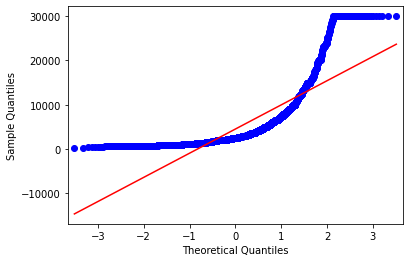

In [ ]:
# Prueba normalidad: ingreso

qqplot(data_riesgo_f['ingreso'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['ingreso'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


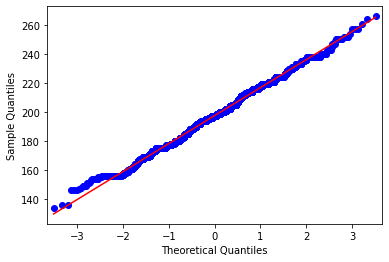

In [ ]:
# Prueba normalidad: score

qqplot(data_riesgo_f['score'] , line='s')
plt.show()

In [ ]:
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_f['score'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=1.000, p-value=0.000


## A. Normalizando variables / transformadas

normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [ ]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_riesgo_num2_norm = scaler.fit_transform(data_riesgo_num2)
data_riesgo_num2_norm



array([[0.2       , 0.05660377, 0.04615385, 0.10397204, 0.43939394],
       [0.18461538, 0.15437393, 0.05384615, 0.09393064, 0.62878788],
       [0.12307692, 0.11320755, 0.05384615, 0.05890957, 0.51515152],
       ...,
       [0.43076923, 0.16981132, 0.95384615, 0.76570057, 0.68181818],
       [0.29230769, 0.25728988, 0.93076923, 0.41257786, 0.8030303 ],
       [0.69230769, 0.99313894, 0.29230769, 0.66528653, 0.78787879]])

In [ ]:
data_riesgo_num2_norm = pd.DataFrame(
    data=data_riesgo_num2_norm,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])
data_riesgo_num2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


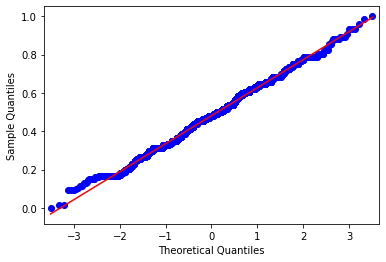

In [ ]:
qqplot(data_riesgo_num2_norm['score'] , line='s')
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_norm['score'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.560, p-value=0.000


La data sigue sin tener una distribución normal.

## B. Estandarización de variables

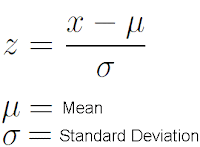



In [ ]:
data_riesgo_num2_estand = zscore(data_riesgo_num2, axis=1)
data_riesgo_num2_estand

array([[-0.54441568, -0.46889072, -0.56588067,  1.99719782, -0.41801075],
       [-0.56787142, -0.43257972, -0.5899779 ,  1.99471247, -0.40428342],
       [-0.59691749, -0.41157401, -0.62618225,  1.98911181, -0.35443805],
       ...,
       [-0.51087373, -0.49490209, -0.50255973,  1.9999558 , -0.49162025],
       [-0.52480563, -0.48290254, -0.50812576,  1.99975354, -0.48391961],
       [-0.52367955, -0.4466083 , -0.5270965 ,  1.9991701 , -0.50178575]])

In [ ]:
data_riesgo_num2_estand = pd.DataFrame(
    data=data_riesgo_num2_estand,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])
data_riesgo_num2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


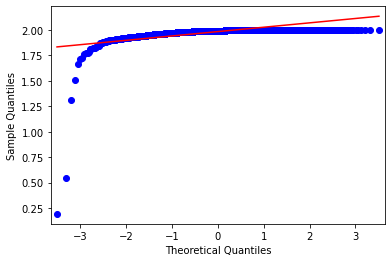

In [ ]:
qqplot(data_riesgo_num2_estand['ingreso'] , line='s')
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_estand['ingreso'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.964, p-value=0.000


## C. Normalización con SKLEARN

Estandariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

skler = StandardScaler()
data_riesgo_num2_skler = skler.fit_transform(data_riesgo_num2)
data_riesgo_num2_skler


array([[-0.37774818, -0.76421908, -0.64000611, -0.23160496, -0.288591  ],
       [-0.4795854 ,  0.01617997, -0.60940366, -0.28652766,  1.00820113],
       [-0.88693427, -0.3124091 , -0.60940366, -0.47807974,  0.23012585],
       ...,
       [ 1.14981007,  0.13940087,  2.97108339,  3.3878012 ,  1.37130292],
       [ 0.23327512,  0.83765265,  2.87927603,  1.45635279,  2.20124989],
       [ 2.88104277,  6.71118234,  0.3392724 ,  2.83857416,  2.09750652]])

In [ ]:
import numpy as np
np.var(data_riesgo_num2_skler[:, 1]) # revisamos una de las columnas

1.0

In [ ]:
data_riesgo_num2_skler = pd.DataFrame(
    data=data_riesgo_num2_skler,
    columns=['edad', 'meses', 'max_ant', 'ingreso', 'score'])
data_riesgo_num2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     4500 non-null   float64
 1   meses    4500 non-null   float64
 2   max_ant  4500 non-null   float64
 3   ingreso  4500 non-null   float64
 4   score    4500 non-null   float64
dtypes: float64(5)
memory usage: 175.9 KB


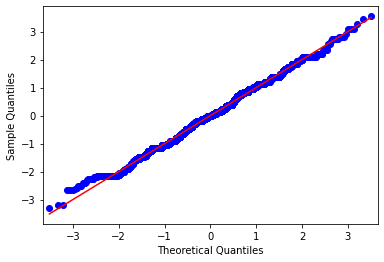

In [ ]:
qqplot(data_riesgo_num2_skler['score'] , line='s')
plt.show()

In [ ]:
# Test de Kolmogorov-Smirnov
#Cuando n > 50

stat2, p2 = kstest(data_riesgo_num2_skler['score'] , 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.040, p-value=0.000


In [ ]:
import numpy  as np

np.random.seed(987654321)

mu, sigma = 0, 1  # Media y desviación estándar
mu1, sigma1 = 0.01, 1.01  # Media y desviación estándar

x = np.random.normal(mu, sigma, 4500)  # generando ua variable aleatoria
y = np.random.normal(mu1, sigma1, 4500)

dat = pd.DataFrame(
    data=np.transpose([x, y]),
    columns=["aleatorioX", "aleatorioY"])
dat 

,aleatorioX,aleatorioY
0,2.246551,-1.115130
1,-0.645918,0.169766
2,-1.183577,-0.639214
3,1.929493,-0.614270
4,0.066814,1.018083
...,...,...
4495,-0.172015,0.265078
4496,1.007704,0.580823
4497,0.478563,-0.094140
4498,1.095647,-0.124623


Text(0.5, 1.0, 'aleatorioY')

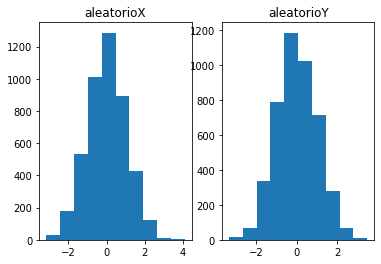

In [ ]:
plt.subplot(1,2,1)
plt.hist(dat['aleatorioX'])
plt.title('aleatorioX')

plt.subplot(1,2,2)
plt.hist(dat['aleatorioY'])
plt.title('aleatorioY')

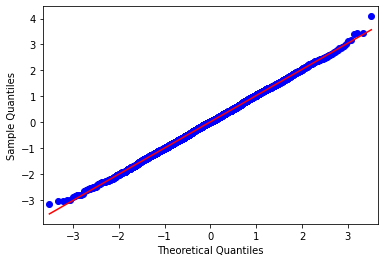

In [ ]:
qqplot(dat['aleatorioX'], line='s')
plt.show()

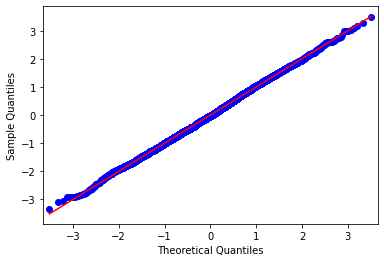

In [ ]:
qqplot(dat['aleatorioY'], line='s')
plt.show()

In [ ]:
# aleatorioX
stat3, p3 = kstest(dat['aleatorioX'], 'norm', alternative='two-sided' ) # 2 colas
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.014, p-value=0.302


In [ ]:
# aleatorioY
stat3, p3 = kstest(dat['aleatorioY'], 'norm', alternative='two-sided' ) # 2 colas
print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Estadisticos=0.014, p-value=0.365


## Correlaciones


Planteamiento de hipótesis:

Ho: No existe correlacion entre las variables A y B.

Ha: Existe correlacion entre las variables A y B.

Nivel de significancia = 5%

### Prueba de Correlacion: paramétrica  " r pearson"

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


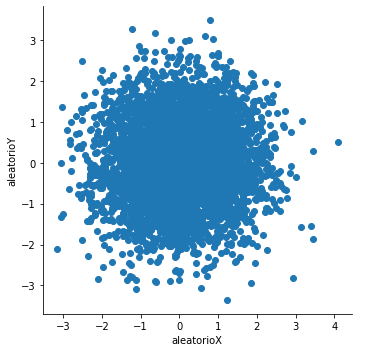

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(dat, size=5).map(plt.scatter, "aleatorioX", "aleatorioY").add_legend()


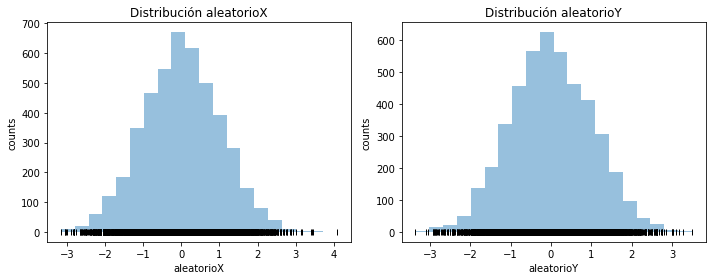

In [ ]:
# Gráfico distribución de las variables

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=dat.aleatorioX, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(dat.aleatorioX, np.full_like(dat.aleatorioX, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución aleatorioX')
axs[0].set_xlabel('aleatorioX')
axs[0].set_ylabel('counts')

axs[1].hist(x=dat.aleatorioY, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(dat.aleatorioY, np.full_like(dat.aleatorioY, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución aleatorioY')
axs[1].set_xlabel('aleatorioY')
axs[1].set_ylabel('counts')


plt.tight_layout();

In [ ]:
# Correlación r de pearson
from scipy.stats import pearsonr, spearmanr

r, p = pearsonr(dat['aleatorioX'], dat['aleatorioY'])

print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))

Correlación Pearson=0.013, p-value=0.393


Conclusión: Con un nivel de significancia del 5% se afirma que, no existe correlación entre **aleatorioX** y **aleatorioY**.

### Prueba de Correlacion: No parametrica

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


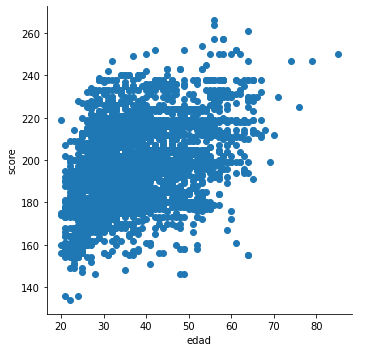

In [ ]:
# Graficamos las variables a correlacionar

sns.FacetGrid(data_riesgo_num2, size=5).map(plt.scatter, "edad", "score").add_legend()

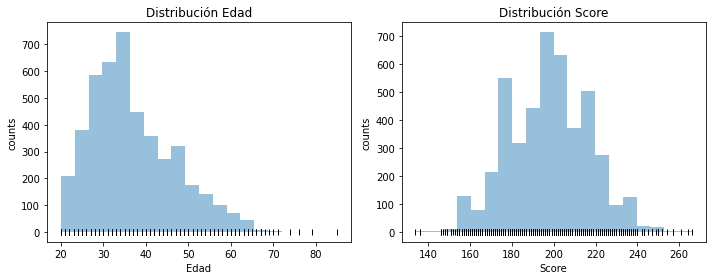

In [ ]:
# Gráfico distribución de las variables

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=data_riesgo_num2.edad, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(data_riesgo_num2.edad, np.full_like(data_riesgo_num2.edad, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Edad')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('counts')

axs[1].hist(x=data_riesgo_num2.score, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(data_riesgo_num2.score, np.full_like(data_riesgo_num2.score, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Score')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('counts')


plt.tight_layout();

In [ ]:
# Correlación spearmanr
#from scipy.stats import pearsonr, spearmanr

rho, p = spearmanr(data_riesgo_num2['edad'], data_riesgo_num2['score'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Correlación Rho=0.417, p-value=0.000


Conclusión: Con un nivel de significancia del 5% se afirma que, la edad y el score son mutuamente dependientes, con una correlación de rho = 0.417.

## Chi - Cuadrado

2 variables son cualitativas (ordinales y/o nominales)

Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.


In [ ]:
#                                          VI                        VD
contingencia= pd.crosstab(data_riesgo_cat2['tipo_vivienda'], data_riesgo_cat2['riesgo']) 
contingencia

riesgo,0.0,1.0
tipo_vivienda,,
1.0,18,32
2.0,858,2234
3.0,6,35
4.0,468,849


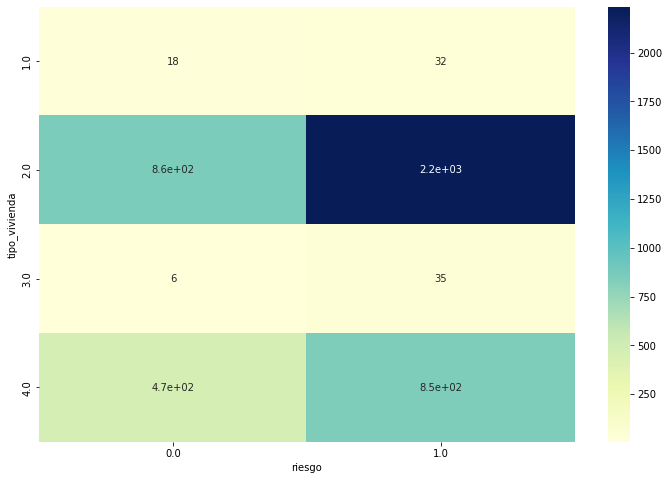

In [ ]:
# Mapa de calor
plt.figure(figsize=(12,8)) 
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)

p-value = 0.000


## Prueba de  Dos muestras Independientes

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

"Prueba de T de Student""
Utilizamos cuando los 2 grupos o muestras, la variable de investigaci?n tienen distribuciones normales.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


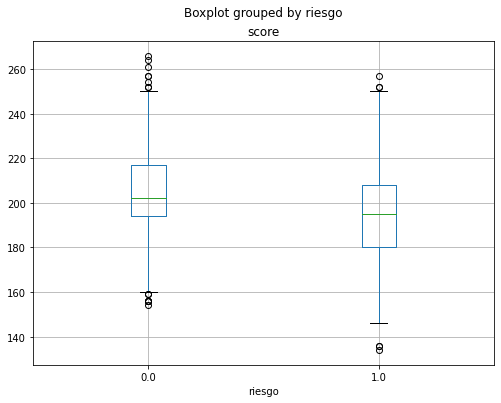

In [ ]:
# Graficamos 

data_riesgo_f.boxplot(column="score", by="riesgo",
	figsize=(8,6))
plt.show()

In [ ]:
# Extrayendo la data para la prueba: riesgo y score

score_riesgo_0 = data_riesgo_f[data_riesgo_f['riesgo'] ==0]['score']
score_riesgo_1 = data_riesgo_f[data_riesgo_f['riesgo'] ==1]['score']
print("riesgo 0= ", score_riesgo_0 )
print("riesgo 1= ", score_riesgo_1 )

riesgo 0=  3150    194.0
3151    221.0
3152    224.0
3153    188.0
3154    177.0
        ...  
4495    214.0
4496    219.0
4497    224.0
4498    240.0
4499    238.0
Name: score, Length: 1350, dtype: float64
riesgo 1=  0       192.0
1       217.0
2       202.0
3       194.0
4       200.0
        ...  
3145    155.0
3146    155.0
3147    225.0
3148    214.0
3149    224.0
Name: score, Length: 3150, dtype: float64


In [ ]:
# Realizando la prueba t de 2 muestras independientes
from scipy.stats import ttest_ind

stadis, p = ttest_ind(score_riesgo_0, score_riesgo_1)

print('Prueba T=%.3f, p-value=%.3f' % (stadis, p))

Prueba T=16.088, p-value=0.000


Conclusion: Con un nivel de significancia del 5% se afirma que, existen diferencias entre las medias del score por tipo de riesgo.


## Prueba de Dos muestras Dependientes o Pareadas

Ho: Mu1 = Mu2; No existen diferencias entre las medias.

Ha: Mu1 <> Mu2; Existen diferencias entre las medias.

"Prueba de T de Student" Utilizamos cuando los 2 grupos o muestras, la variable de investigación tienen distribuciones normales.

In [ ]:
# Para este caso, vamos a generar datos aleatorios de tipo riesgo.

#Observaremos en un 1er momento y 2do momento

import numpy  as np

np.random.seed(987654321)

mu1, sigma1 = 180, 60  # Media y desviación estándar
mu2, sigma2 = 250, 65  # Media y desviación estándar

P1er_momento = np.random.normal(mu1, sigma1, 4500)  # generando una variable aleatoria
P2do_momento = np.random.normal(mu2, sigma2, 4500)

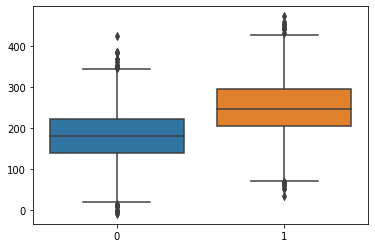

In [ ]:
# Graficamos 
import seaborn as sns
x= [P1er_momento, P2do_momento]
ax=sns.boxplot(data=x)

In [ ]:
# Realizando la prueba t de 2 muestras dependientes o pareadas
from scipy.stats import ttest_rel

stadis, p = ttest_rel(P1er_momento, P2do_momento)

print('Estadístico=%.3f, p-value=%.3f' % (stadis, p))

Estadístico=-52.459, p-value=0.000


Conclusion: Con un nivel de significancia del 5% se afirma que, existen diferencias entre el score observado en el 1er momento y el 2do momento.

## Prueba de ANOVA: "n" muestras independientes

Ho: Mu1 = Mu2  = Mun; No existen diferencias entre las medias de los "n" grupos.

Ha: Mu1 <> Mun; Existen diferencias entre al menos dos medias.

"Prueba de ANOVA" Utilizamos cuando los "n" grupos o muestras, en la variable de investigación tienen distribuciones normales.

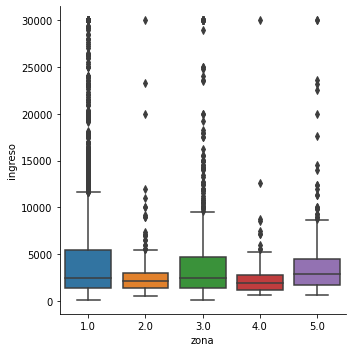

In [ ]:
# Graficamos 
import seaborn as sns

sns.catplot(x = "zona", y = "ingreso", data = data_riesgo_f, kind = "box");

In [ ]:
# Tabla de frecuencia de la variable de agrupamiento
zona_count = (data_riesgo_f
                       .groupby("zona")
                       .agg(frequency=("zona", "count")))

zona_count["Acumulado"] = zona_count["frequency"].cumsum()
zona_count

,frequency,Acumulado
zona,,
1.0,3088,3088
2.0,210,3298
3.0,749,4047
4.0,131,4178
5.0,322,4500


Continuamos bajo el supuesto de normalidad de los datos

In [ ]:
# Realizando la prueba ANOVA para "n" muestras independientes

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('ingreso ~ zona', data =data_riesgo_f).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

                sum_sq      df          F   PR(>F)
zona      5.827196e+08     1.0  19.607259  0.00001
Residual  1.336787e+11  4498.0        NaN      NaN


Conclusion: Con un nivel de significancia del 5% se afirma que, al menos un par de medias son significativamente distintas la una de la otra.

## Test de Levene
Prueba de igualdad de varianzas

Ho: No existen diferencias entre las varianzas / homoscedasticidad (igualdad de varianzas)

Ha: Existen diferencias entre las varianzas / no son iguales (homogénea)

In [ ]:
# Extrayendo la data para la prueba: riesgo y score

zona_1 = data_riesgo_f[data_riesgo_f['zona'] ==1]['ingreso']
zona_2 = data_riesgo_f[data_riesgo_f['zona'] ==2]['ingreso']
zona_3 = data_riesgo_f[data_riesgo_f['zona'] ==3]['ingreso']
zona_4 = data_riesgo_f[data_riesgo_f['zona'] ==4]['ingreso']
print("zona 1= ", zona_1 )
print("zona 2= ", zona_2 )
print("zona 3= ", zona_3 )
print("zona 4= ", zona_4 )

zona 1=  1        2930.0
2        1883.7
3         850.0
4        3200.0
7         800.0
         ...   
4492    30000.0
4493     5250.0
4494     7500.0
4495    24000.0
4497    23000.0
Name: ingreso, Length: 3088, dtype: float64
zona 2=  6        2171.50
24       3486.70
69       1800.00
73       3500.00
95       3420.36
          ...   
4368     2330.65
4378     6529.52
4431     5442.50
4436    10000.00
4451     3600.00
Name: ingreso, Length: 210, dtype: float64
zona 3=  0        3230.0
8        3150.0
16       2432.0
17       1400.0
18       3000.0
         ...   
4398    10000.0
4401     4900.0
4453     5500.0
4458     2555.0
4488    15600.0
Name: ingreso, Length: 749, dtype: float64
zona 4=  14      1050.00
40      1460.00
42       966.06
53      2248.76
77      1239.30
         ...   
3940    2800.00
3995    1288.39
3999    3000.00
4110    7461.05
4421    5546.00
Name: ingreso, Length: 131, dtype: float64


In [ ]:
from scipy.stats import levene

stat, p = levene(zona_1, zona_2, zona_3, zona_4)

print('Prueba Igualdad de Varianzas=%.3f, p-value=%.3f' % (stat, p))


Prueba Igualdad de Varianzas=13.588, p-value=0.000


Siendo que Pvalue <= 0.05, el test Levene encuentra diferencias significativas entre las varianzas de los dos grupos.

## Prueba de Dos Proporciones

Ho: Pa = Pb ; la proporción (a) no es diferente de la proporción (b)

Ha: Pa <> Pb; la proporción (a) es diferente de la proporción (b)



In [ ]:
from scipy.stats import norm

# observaciones "Tamaño de las muestras"
n1 = 200  # clientes
n2 = 300  # Usuarios

# aciertos / la misma variable "Clientes/Usuarios totalmente satisfechos"
x1 = 50   # clientes
x2 = 150  # Usuarios

p1 = x1/n1
p2 = x2/n2

p= (x1 + x2)/(n1 + n2) # proporción muestral

z_stat = (p1 - p2) / np.sqrt(p*(1-p)*((1/n1) + (1/n2)))
p = norm.cdf(z_stat)

print('Diferencia de proporciones=%.3f, p-value=%.3f' % (z_stat, p))

Diferencia de proporciones=-5.590, p-value=0.000


Decision: la proporción (a) es diferente de la proporción (b)

## PRUEBA WILCOXON 2 MUESTRAS RELACIONADAS O PAREADAS
(no paramétrica)

Ho: Med(Diferencia) = 0; La mediana de las diferencias de cada par de datos es cero.

Ha: Med(Diferencia) <> 0; La mediana de las diferencias de cada par de datos es diferente de cero.

In [ ]:
# Trabajamos la data
P1er_momento = np.random.random(4500)*250 
P2do_momento = np.random.random(4500)*265

# velocidad
print(P1er_momento)
print(P2do_momento)


[240.46650679  86.53910451  91.87129498 ... 110.69654602 126.86777721
  56.72136688]
[ 53.96975623 144.11216995  52.24050651 ... 221.96443088  47.08878092
 131.42827265]


In [ ]:
from scipy.stats import wilcoxon

wi_test, p = wilcoxon(P1er_momento, P2do_momento)

print('Prueba de Wilcoxon=%.3f, p-value=%.3f' % (wi_test, p))

Prueba de Wilcoxon=4720861.000, p-value=0.000


Decisión: La mediana de las diferencias de la Velocidad en el 1er y 2do momento es diferente de cero.

## Prueba U de Mann Whitney: muestras independientes

(no paramétrica)

Diferencia de medianas

Ho: U1 = U2; de la variable de estudio.

Ha: U1 <> U2; de la variable de estudio


In [ ]:
# Extrayendo la data para la prueba: riesgo y edad

edad_riesgo_0 = data_riesgo_f[data_riesgo_f['riesgo'] ==0]['edad']
edad_riesgo_1 = data_riesgo_f[data_riesgo_f['riesgo'] ==1]['edad']
print("riesgo 0= ", edad_riesgo_0 )
print("riesgo 1= ", edad_riesgo_1 )

riesgo 0=  3150    37.0
3151    33.0
3152    41.0
3153    44.0
3154    38.0
        ... 
4495    54.0
4496    63.0
4497    48.0
4498    39.0
4499    65.0
Name: edad, Length: 1350, dtype: float64
riesgo 1=  0       33.0
1       32.0
2       28.0
3       56.0
4       32.0
        ... 
3145    64.0
3146    64.0
3147    76.0
3148    33.0
3149    45.0
Name: edad, Length: 3150, dtype: float64


In [ ]:
print("Con riesgo --> n1: ", len(edad_riesgo_0))
print("Sin riesgo --> n2: ", len(edad_riesgo_1))

Con riesgo --> n1:  1350
Sin riesgo --> n2:  3150


In [ ]:
from scipy.stats import kruskal

KW_test, p =kruskal(edad_riesgo_0, edad_riesgo_1)

print('Prueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))

Prueba de U de Mann Whitney=74.413, p-value=0.000


Gracias DATA & ANALYTICS!!!